# **Diffusion Models : Construire votre propre Stable Diffusion**

<img src="https://i.ibb.co/3NgPbzm/diffusion-prac-banner.png" width="100%" />

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.

**Auteurs:** Sebastian Bodenstein, Kevin Eloff, Amel Sellami

**Relecteurs:** Elizaveta Semenova, Redouane Lguensat

**Introduction :**

Les modèles de diffusion à débruitage (Denoising Diffusion Models) sont une variante de la modélisation générative qui constitue l'épine dorsale des progrès récents en matière de synthèse d'images - notamment Dall-E, Stable Diffusion et Midjourney. Ces modèles utilisent un processus de débruitage itératif pendant la génération afin de produire des échantillons de haute qualité. Dans ce TP, nous explorerons les principes fondamentaux des modèles de diffusion, l'intuition qui les sous-tend et leur fonctionnement en pratique. À la fin du TP, nous aurons couvert toutes les étapes nécessaires à l'apprentissage d'un de ces modèles à partir de zéro !


**Sujets :**

Contenu : <font color='blue'>`Modèles Génératifs`</font>, <font color='blue'>`Diffusion`</font>.

Niveau : <font color='yellow'>`Intermédiaire`</font> à <font color='red'>`Avancé`</font>.

**Objectifs/Apprentissages:**

- Principes fondamentaux et intuition des modèles de diffusion
- Comprendre les exigences mathématiques et de formulation
- Expérience avec l'échantillonnage de modèles de diffusion
- Comment entraîner des modèles de diffusion

**Prérequis :**

- Familiarité avec les méthodes statistiques :
    - Distribution normale multivariée
- Familiarité avec Python, Numpy et Jax

**Plan :**
    





>[Modèles de Diffusion : Créer votre propre Stable Diffusion](#scrollTo=_ZefMi2Op8jj)

>>[Installation et Importations](#scrollTo=L2srm6q5p8jk)

>>[Modèles de Diffusion : Historique](#scrollTo=MFX3d5hu-f7l)

>>[Applications](#scrollTo=DR5alVTk-qiL)

>>[Introduction à la Génération d’Images avec la Diffusion](#scrollTo=GtmZWxNfqQ8L)

>>[1.1 Distributions d’échantillonnage pour générer des images](#scrollTo=SnOp4fe5rOkZ)

>>[1.2 La Diffusion en pratique - Exemple avec Stable Diffusion](#scrollTo=H2FVAq6yp8jk)

>>>[Important : Lancez le code dans cette sous-section (jusqu’à 1.3) seulement si vous utilisez Google Colab ! Sinon, nous vous recommandons de simplement le lire](#scrollTo=H2FVAq6yp8jk)

>>[1.3 Que sont les modèles de diffusion par débruitage ?](#scrollTo=t2_qL-Nzp8jl)

>>>[Rappels mathématiques](#scrollTo=JdoOYSZPp8j0)

>>[1.4 Conditions préalables à la Diffusion](#scrollTo=LfdgfYdBp8j0)

>>[1.4.1 Calendrier de bruit de diffusion](#scrollTo=9TBGnHI8p8j1)

>>>[Rappels mathématiques](#scrollTo=h23CB2sf_6Co)

>>[1.5 Diffusion vers l’avant](#scrollTo=EYHjneYPJNEy)

>>>[Fondements mathématiques de la diffusion vers l’avant (Facultatif)](#scrollTo=M-JDHCCBMCq4)

>>>[Exemple de diffusion vers l’avant appliquée à une image](#scrollTo=9ec_7WSZKNAU)

>>>[Fondements mathématiques de la diffusion vers l’avant (suite) (Facultatif)](#scrollTo=fbuNQbtzMYmF)

>>[1.6 Diffusion inverse](#scrollTo=upAHpuGxp8j2)

>>>[Introduction mathématique à la diffusion inverse (facultatif)](#scrollTo=wzhGWWAVN0TR)

>>>[La diffusion inverse en pratique](#scrollTo=v9-b-qZSPI75)

>>[1.7 Amélioration du processus inverse avec un modèle](#scrollTo=hr8Tq9sup8j3)

>[Entraînement et Échantillonnage (génération d’images)](#scrollTo=RLeHee8ep8j3)

>>[2.1. Assembler le tout](#scrollTo=uQUXl-64p8j3)

>>>[Entraînement](#scrollTo=eRXmcUJcp8j3)

>>>[Génération et échantillonnage](#scrollTo=iydKOuAmp8j7)

>>[2.2 Diffusion en une dimension](#scrollTo=xtxUZBpC5yBq)

>>[2.3 Entraînement d’un modèle](#scrollTo=A47aGk11goW2)

>[Conclusion](#scrollTo=U1Z1me6sp8kG)

>>[Commentaires](#scrollTo=Ol-0Ae-7p8kG)


**Avant de commencer :**

Pour ces exercices pratiques, vous aurez besoin d’utiliser un GPU si vous êtes sur Google Colab pour générer des images. Pour ce faire, allez dans le menu « Exécution » de Colab, sélectionnez « Modifier le type d’exécution », puis dans le menu contextuel, choisissez « GPU » dans la zone « Accélérateur matériel ».

Une autre étape importante que vous devez effectuer. Vous ne pouvez pas continuer sans cela !
- Allez dans « Outils » > « Paramètres » > « Divers »
- Assurez-vous que les options « Mode kitty et « Mode Corgi » sont cochées !
    


**Niveau d'expérience suggéré pour ce sujet :**

| Niveau         | Expérience                            |
| --- | --- |
`Débutant`      | C'est la première fois que je suis initié à ce travail. |
`Intermédiaire`  | J'ai suivi quelques cours/introductions de base sur ce sujet. |
`Avancé`      | Je travaille dans ce domaine/sujet quotidiennement. |
    



In [ ]:
# @title **Chemins à suivre :** Quel est votre niveau d'expérience dans les sujets présentés dans ce notebook ? (Exécutez la cellule)
experience = "advanced" #@param ["beginner", "intermediate", "advanced"]

if experience == "beginner":
    print("""
    En fonction de votre expérience, nous vous conseillons :
    - De passer les tâches de codage, et de vous concentrer plutôt sur votre compréhension
    - D'exécuter plutôt les cellules et de jouer avec les sorties.

    En termes de contenu, nous vous suggérons de vous concentrer sur les sections 1.1, 1.5, 2.1 et 2.4 !
    """)
elif experience == "intermediate":
    print("""
    En fonction de votre expérience, nous vous conseillons :
    - D'essayer les tâches de codage et d'essayer d'acquérir une compréhension globale des concepts mathématiques.

    En termes de contenu, nous vous suggérons de vous concentrer sur les sections 1.1, 1.5, 2.1 et 2.4 !
    """)
elif experience == "advanced":
    print("""
    En fonction de votre expérience, nous vous conseillons de parcourir l'ensemble du notebook en détail.

    N'hésitez pas à jouer avec le code et à créer vos propres implémentations !
    """)

print("\nRemarque : ceci n'est qu'une indication !")



## Installation et importation des modules
    


In [ ]:
## Installation et importation des modules nécessaires. Capture masque la sortie de la cellule.
# @title Installation et importation des packages requis. (Exécuter la cellule)
%%capture
# !pip install jax==0.3.25 jaxlib==0.3.25 flax transformers ftfy

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from tqdm.auto import tqdm
from PIL import Image
import requests
import torch
import seaborn



In [ ]:
# @title Vérification TPU/GPU. (Exécuter la cellule) (REMOVE)
num_devices = jax.device_count()
device_type = jax.devices()[0].device_kind

print(f" {num_devices} appareils JAX du type {device_type} trouvés.")
# # assert (
# #     « TPU » dans device_type ou « GPU » dans device_type
# # ), "Le périphérique disponible n'est pas un TPU/GPU, veuillez sélectionner un TPU/GPU dans Édition > Paramètres du notebook > Accélérateur matériel"


In [ ]:
# @title Fonctions utilitaires. (Exécuter la cellule)

def extract(a, t, x_shape):
    batch_size = x_shape[0]
    out = a[..., t]
    return jnp.reshape(out, (batch_size, *((1,) * (len(x_shape) - 1))))

def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Distribution gaussienne bivariée pour une forme égale *X*, *Y*.
    Voir `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    sur mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom


# Diffusion Models : Historique
Les modèles de diffusion en deep learning génèrent des données (similaires aux données d'entraînement) en ajoutant et en inversant itérativement du bruit.

La diffusion est basée sur le processus de propagation des particules.
Comme la propagation des particules dans un fluide, les modèles de diffusion distribuent progressivement l'information.

La diffusion a été explorée comme une alternative aux modèles [GAN](https://www.deeplearningbook.org/contents/generative_models.html) ou [VAE](https://www.deeplearningbook.org/contents/autoencoders.html).

Les modèles de diffusion ont considérablement évolué depuis leurs débuts traditionnels dans le traitement d'images, où ils étaient principalement utilisés pour des tâches telles que la réduction du bruit et la restauration d'images. Ces premières méthodes reposaient sur des modèles mathématiques élaborés à la main pour décrire le processus de diffusion. Cependant, l'avènement du deep learning a marqué un tournant. En tirant parti des réseaux neuronaux, les modèles de diffusion peuvent désormais apprendre les complexités du processus de diffusion directement à partir des données, libérant ainsi leur potentiel pour une vaste gamme d'applications, en particulier dans le domaine de la modélisation générative.


## Applications

***Synthèse et restauration d'images***
* Les modèles de diffusion peuvent être utilisés pour générer des images de haute qualité. En partant d'un bruit aléatoire, le processus de diffusion affine progressivement ce bruit en plusieurs étapes pour produire une image ressemblant à celles de l'ensemble de données d'entraînement.
* Super-résolution : Ces modèles peuvent améliorer la résolution des images, en prenant une image basse résolution et en l'affinant de manière itérative pour produire une version à plus haute résolution.
* Inpainting d'images : Si une image comporte des parties manquantes ou des obstructions indésirables, les modèles de diffusion peuvent être utilisés pour combler ou « inpainter » ces lacunes en affinant de manière itérative l'image incomplète jusqu'à ce qu'elle apparaisse entière.
* Débruitage : Comme son nom l'indique, l'une des utilisations fondamentales des modèles de diffusion est d'éliminer le bruit des images, améliorant ainsi leur qualité.

***Génération de contenu : Texte, sons, etc.***
* Génération de texte : Bien que les images soient une application courante, les modèles de diffusion peuvent également être adaptés au texte. Ils peuvent générer du texte cohérent et contextuellement pertinent au cours d'étapes de raffinement itératives.
* Synthèse sonore : Les modèles de diffusion ont le potentiel d'être utilisés pour générer ou améliorer le contenu audio. En commençant par du bruit ou une mélodie de base, le modèle peut affiner l'audio en plusieurs étapes pour produire un son plus riche.
* Synthèse vidéo : En appliquant les principes de diffusion image par image, ces modèles peuvent aider à générer ou à améliorer le contenu vidéo.

***Autres applications***
* Découverte de médicaments : En bio-informatique, les modèles de diffusion peuvent être utilisés pour explorer le vaste espace des structures moléculaires, en affinant de manière itérative les molécules candidates pour une utilisation thérapeutique potentielle.
* Détection d'anomalies : En apprenant le processus de diffusion de données « normales », ces modèles peuvent identifier les points de données qui ne suivent pas le modèle de diffusion attendu, les signalant comme des anomalies.


# 1. Introduction à la génération d'images avec la diffusion
    


## 1.1 Échantillonnage de distributions pour générer des images
Les images numériques sur les ordinateurs sont généralement définies par trois canaux de couleur : <font color='red'>rouge</font>, <font color='lime'>vert</font> et <font color='blue'>bleu</font> (RVB). Ce sont les couleurs primaires utilisées pour représenter les images au format numérique. Chaque pixel d'une image est composé de trois valeurs correspondant aux canaux rouge, vert et bleu. En combinant différentes intensités de ces trois couleurs, un large spectre de couleurs peut être créé.
Dans notre configuration, les intensités de couleur varient de 0 à 1, 1 étant le plus intense et 0 le moins intense.

Si nous voulons générer une image par échantillonnage, nous voulons généralement dire que nous voulons échantillonner ces trois canaux de couleur RVB pour chaque pixel d'une manière intelligente qui aboutit à une image, par exemple un chat. Mais qu'entend-on par échantillonner ces couleurs ?

Commençons par échantillonner des couleurs de pixels à partir de distributions gaussiennes définissant séparément chacun des trois canaux RVB. Jouez avec la moyenne et l'écart type de chaque couleur pour visualiser comment la distribution change !

_Remarque : Nous appliquons une opération modulo pour nous assurer que les valeurs restent comprises entre 0 et 1. Cela peut entraîner une distribution bimodale si vos moyennes sont proches de 0 ou 1 ! Alternativement, une opération de découpage peut être utilisée._


In [ ]:
#@title Visualisez les distributions des couleurs (Exécuter la cellule) { run: "auto" }

np.random.seed(42)

resolution = 0.025
bins = np.arange(0, 1 + resolution, resolution)

red_mean = 0.6 #@param {type:"slider", min:0, max:1, step:0.05}
red_std = 0.15 #@param {type:"slider", min:0.05, max:1, step:0.05}

green_mean = 0.3 #@param {type:"slider", min:0, max:1, step:0.05}
green_std = 0.2 #@param {type:"slider", min:0.05, max:1, step:0.05}

blue_mean = 0.75 #@param {type:"slider", min:0, max:1, step:0.05}
blue_std = 0.1 #@param {type:"slider", min:0.05, max:1, step:0.05}

# r, g, b correspondent aux couleurs rouge, vert et bleu, respectivement.
r = np.random.normal(red_mean, red_std, size=(100000,))%1
# density, _, _ = plt.hist(r, bins=bins, density=True, alpha=0.3, color='red');
# plt.plot(bins[:-1]+resolution/2, density, color='red')
seaborn.histplot(r, bins=bins, kde=True, color='red', stat="density", alpha=0.3, linewidth=0)

g = np.random.normal(green_mean, green_std, size=(100000,))%1
# density, _, _ = plt.hist(g, bins=bins, density=True, alpha=0.3, color='green');
# plt.plot(bins[:-1]+resolution/2, density, color='green')
seaborn.histplot(g, bins=bins, kde=True, color='green', stat="density", alpha=0.3, linewidth=0)

b = np.random.normal(blue_mean, blue_std, size=(100000,))%1
# density, _, _ = plt.hist(b, bins=bins, density=True, alpha=0.3, color='blue');
# plt.plot(bins[:-1]+resolution/2, density, color='blue')
seaborn.histplot(b, bins=bins, kde=True, color='blue', stat="density", alpha=0.3, linewidth=0)
plt.xlabel("Intensité de la couleur")
plt.ylabel("Distribution")
plt.xlim(0,1)
plt.grid()




Maintenant que les distributions des trois couleurs ont été définies, nous pouvons tracer quelques échantillons :
    



In [ ]:
#@title Tracer des échantillons à partir des distributions ci-dessus (Exécuter la cellule)

import matplotlib.pyplot as plt
import numpy as np

def generate_color_samples(num_samples=12):
  fig, axes = plt.subplots(2, 6, figsize=(12, 4))
  axes = axes.flatten()

  for i in range(num_samples):
    r = np.random.normal(red_mean, red_std)%1 # (rouge)
    g = np.random.normal(green_mean, green_std)%1 # (vert)
    b = np.random.normal(blue_mean, blue_std)%1 # (bleu)

    color_array = np.ones((100, 100, 3))
    color_array[:, :, 0] = r
    color_array[:, :, 1] = g
    color_array[:, :, 2] = b

    axes[i].imshow(color_array)
    axes[i].axis('off')
    axes[i].set_title(f"r={r:.1f}, g={g:.1f}, b={b:.1f}")

  plt.tight_layout()
  plt.show()

generate_color_samples()


Nous sommes capables d'échantillonner des couleurs en utilisant une variable aléatoire définissant les intensités de couleur pour le rouge, le vert et le bleu !

Que se passe-t-il si nous essayons d’utiliser cette méthode pour générer une image entière ? Pour ce faire, nous échantillonnons un grand nombre de pixels à la fois (32x32) et les affichons sous forme d’image à l’aide de `plt.imshow()`.


In [ ]:
red = np.random.normal(red_mean, red_std, size=(32,32))%1
green = np.random.normal(green_mean, green_std, size=(32,32))%1
blue = np.random.normal(blue_mean, blue_std, size=(32,32))%1

image = np.stack([red, green, blue], axis=2)
plt.imshow(image);


Comme prévu, il n'y a qu'un ensemble de couleurs de pixels aléatoires. Nous ne pouvons pas vraiment distinguer de forme ou d'objet dans l'image.

Et si nous voulions échantillonner quelque chose de cohérent, comme l'image d'un chat ou d'un chien ? Comment échantillonner les valeurs des pixels de manière à pouvoir générer une image correcte ? Comment pourrions-nous même définir une telle distribution ?

Une approche naïve consisterait à utiliser un simple réseau neuronal linéaire pour prédire la moyenne et la variance d'une distribution gaussienne pour chaque pixel, mais cela convergerait rapidement vers la prédiction de la moyenne et de la variance de l'ensemble du jeu de données. Bien que la forme générale puisse être présente, elle sera probablement floue et difficile à distinguer.

**Travail de groupe :** Considérez que vous avez entraîné un modèle prédictif en utilisant une perte MSE (Mean Squared Error) au niveau du pixel, où le modèle est composé d'un mélange tel que décrit ci-dessus. Pourquoi pensez-vous que ce modèle est susceptible de s'effondrer en ne prédisant que la moyenne et la variance de l'ensemble d'entraînement ?


C'est là que le domaine de la modélisation générative entre en jeu. Nous devons définir une manière d'échantillonner des pixels qui correspondent à d'autres pixels de l'image. La diffusion offre un moyen intuitif d'effectuer un tel échantillonnage.


## 1.2 La diffusion en pratique - Exemple de Stable Diffusion

### <font color="red">Important: Exécutez le code de cette sous-section (jusqu'à 1.3) uniquement si vous utilisez Google Colab ! Sinon, nous vous recommandons de simplement le lire</font>

Pour commencer, nous allons examiner un modèle de génération d'images pré-entraîné. L'objectif ici est simplement d'être témoin de la puissance et des capacités incroyables de ces modèles. Pour cela, nous utiliserons [Stable Diffusion](https://stability.ai/blog/stable-diffusion-public-release) de StabilityAI, disponible sur la bibliothèque de diffuseurs HuggingFace. Vous êtes également invités à essayer d'autres modèles HuggingFace Diffuser, allez jeter un œil [ici](https://huggingface.co/docs/diffusers/index) pour plus d'informations !

Rappel : Il est important que vous utilisiez un runtime Colab GPU pour cela ! `Modifier > Paramètres du notebook > Accélérateur matériel > GPU`

L'exécution de cette cellule peut prendre une minute ou deux, car elle télécharge les différents points de contrôle du modèle. Mettez en commentaire `%%capture` si vous souhaitez voir la progression du téléchargement.


In [ ]:
## Installer les diffuseurs sur Colab (Exécuter la cellule)
%%capture
!pip install diffusers
!pip install invisible_watermark transformers accelerate safetensors




In [ ]:
%%capture
from diffusers import DiffusionPipeline

# télécharger et charger un point de contrôle Stable Diffusion
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")



Maintenant, générons une image ! N'hésitez pas à modifier le prompt comme bon vous semble !

Exemples de prompts :
- "Un baobab géant, dans le style de Nuit étoilée peint par Van Gogh"
- "Un astronaute chevauchant un lion sur Mars"
- "Logo d'un baobab"
    

In [ ]:
prompt = "Créer l'image d'un lever de soleil sénégalais avec un pêcheur dans une pirogue traditionnelle sur un fleuve calme, un baobab imposant en arrière-plan, et les couleurs chaudes du ciel matinal. Incorporer des touches subtiles des couleurs nationales du Sénégal - vert, jaune et rouge - dans le paysage."
image = pipe(prompt=prompt).images[0]
image



C'est pas cool, ça ? On a réussi à partir d'une simple description textuelle et à produire une toute nouvelle image !

**Travail de groupe**
- Quels genres d'images sympas pouvez-vous imaginer ?
- Stable Diffusion est entraîné sur un grand nombre d'images, pensez-vous pouvoir imaginer une image qui ne serait pas dans l'ensemble d'entraînement ? Comment le modèle se comporterait-il ?
  - Nous ne savons pas exactement ce que le modèle a vu ou n'a pas vu, nous savons juste qu'il s'agit de plusieurs téraoctets d'images provenant d'Internet. Cela inclut des images du domaine public, des ensembles de données sous licence et des images téléchargées par les utilisateurs sur diverses plateformes.
    

**Suppression...**

Lorsque vous êtes prêt à passer à la suite, exécutez la cellule ci-dessous. Le modèle de diffusion stable est assez volumineux (~13 Go) et utilise toute notre mémoire GPU disponible... Pour continuer la pratique, nous allons d'abord décharger le modèle et effacer notre mémoire GPU. Exécutez la cellule ci-dessous.

In [ ]:
# @title Exécuter ceci pour effacer la mémoire du GPU. (Exécuter la cellule)
import time
del pipe
del prompt
image_temp = np.asarray(image).copy()
del image
torch.cuda.empty_cache()
time.sleep(2) # torch prend du temps pour supprimer les variables!
torch.cuda.empty_cache()
image = Image.fromarray(image_temp)


<font color='red'>**Attention !** Si cette étape a échoué, vous serez à court de mémoire lorsque vous effectuerez des opérations jax par la suite ! Vérifiez si votre **VRAM GPU** a bien été réinitialisée dans l'onglet des ressources en haut à droite.</font>


## 1.3 Que sont les modèles de diffusion débruiteurs ?

Maintenant que nous avons vu la puissance des modèles de diffusion, comment fonctionnent-ils et comment pouvons-nous les créer ?

Les modèles de diffusion débruiteurs (DDM), communément appelés Diffusion, sont une variante de la modélisation générative. L'objectif d'un modèle génératif est de créer de nouvelles instances d'un artifice après avoir reçu suffisamment d'exemples. Idéalement, nous voulons également que ces modèles se généralisent. Par exemple, si j'ai deux images distinctes d'un « lion » et d'un « astronaute », puis-je créer une nouvelle image contenant les deux ? Ou si j'ai vu un tableau de Vincent Van Gogh, pourrais-je créer une nouvelle image d'un baobab dans le même style ?

La diffusion est le processus consistant à débruiter (ou à affiner) de manière itérative un échantillon à partir d'un bruit aléatoire. L'objectif est de générer un nouvel échantillon qui n'est pas présent dans nos données d'apprentissage.

À partir de maintenant, nous considérerons la diffusion dans le contexte des images, bien que la diffusion puisse théoriquement être appliquée à bien d'autres domaines !
Un modèle probabiliste de diffusion (que nous appellerons un « modèle de diffusion » par souci de concision) est une chaîne de Markov paramétrée et apprise à l'aide de l'inférence variationnelle afin de produire des échantillons correspondant aux données après un temps fini.

Pour ce faire, nous définissons deux processus de diffusion :
- **Diffusion progressive (Forward diffusion)**\
  Le processus d'ajout de bruit à une image.\
  On peut définir cela comme la distribution $q(\mathbf{x}_{t}|\mathbf{x}_{t-1})$ où $\mathbf{x}_t$ est une version légèrement plus bruitée que l'image $\mathbf{x}_{t-1}$.
- **Diffusion inverse (Reverse diffusion)**\
  Le processus d'élimination du bruit d'une image en se déplaçant vers une référence.\
  On peut définir cela comme la distribution $q(\mathbf{x}_{t-1}|\mathbf{x}_t,\mathbf{x}_0)$ où $\mathbf{x}_0$ est l'image de vérité terrain. Ici, $\mathbf{x}_{t-1}$ a moins de bruit que $\mathbf{x}_{t}$ et est plus proche de la cible $\mathbf{x}_0$.
    


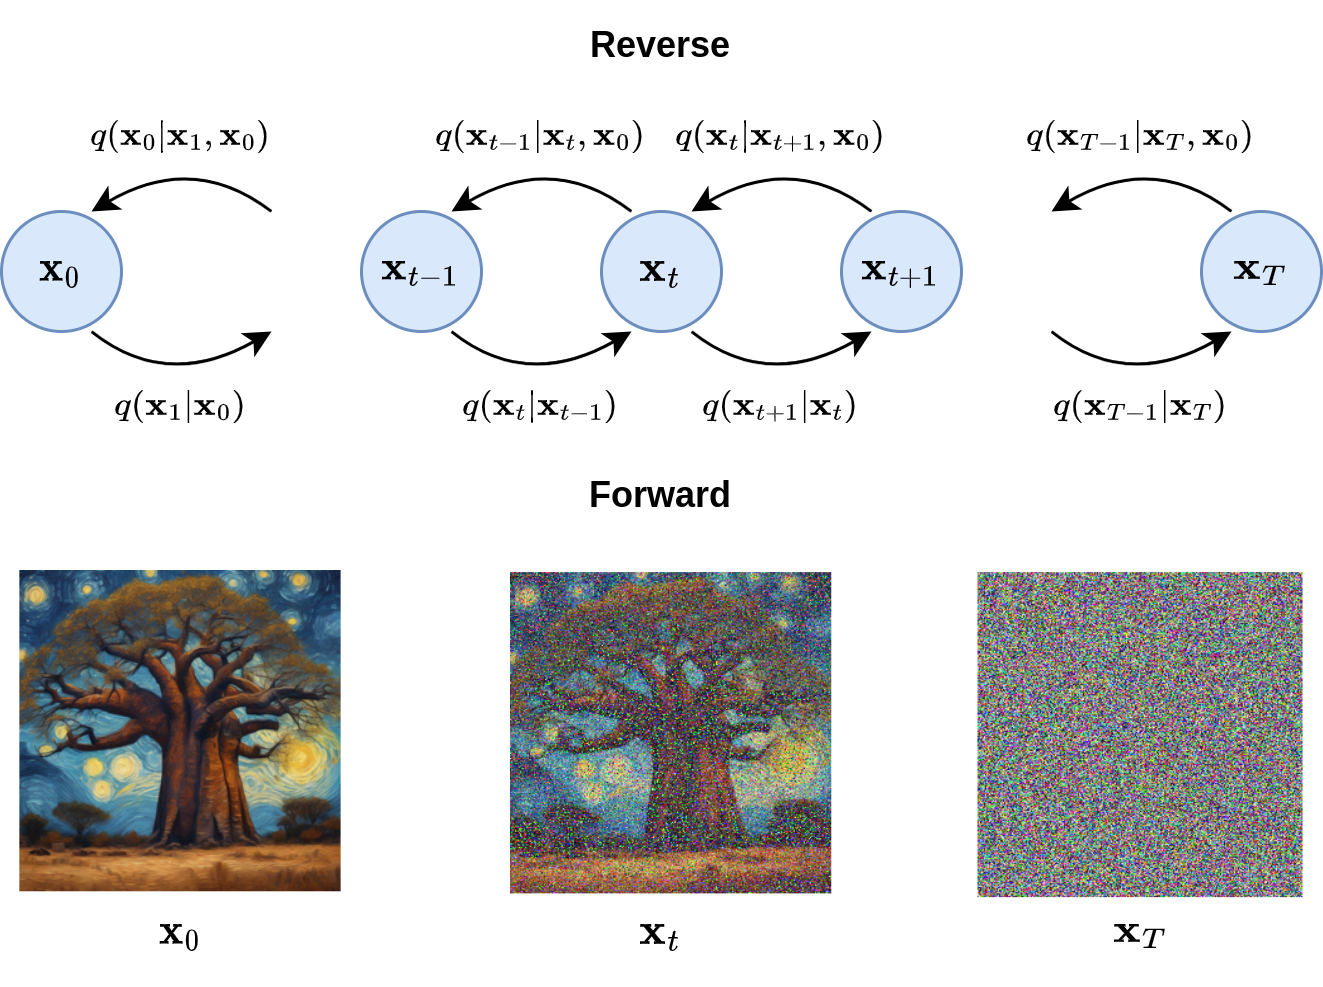

Définissons une certaine terminologie pour les équations à venir :

- $\mathbf{x}_0$ est l'image de vérité fondamentale (ground truth image)
- $\mathbf{x}_t$ est une image bruitée par $t$ étapes
- $T$ est le nombre maximum d'étapes de bruitage
  - $T$ est un hyperparamètre, et peut être choisi. Dans ce TP, nous fixerons $T=300$


### Rappel mathématique
Que signifie ' $q(\mathbf{x}_{t}|\mathbf{x}_{t-1})$' dans l'équation ci-dessus ?

* La barre que l'on voit souvent au milieu de la notation de la distribution de probabilité est utilisée pour séparer les variables aléatoires de la distribution des variables par rapport auxquelles les variables aléatoires sont conditionnées.
* En d'autres termes, nous avons une fonction avec deux types d'entrées différents. Les entrées à droite de la barre sont les variables de conditionnement. Les entrées à gauche de
sont les valeurs des variables aléatoires sous la distribution de probabilité. La sortie de la fonction est la probabilité des valeurs de ces variables aléatoires.
Nous le lisons comme 'la probabilité de $\mathbf{x}_t$ sachant  $\mathbf{x}_{t-1}$'.


## 1.4 Conditions requises pour la diffusion

L'idée derrière les modèles de diffusion ne se limite pas aux images. Elle peut en fait être appliquée à d'autres domaines. En général, si vous pouvez respecter à ces exigences, vous devriez être en mesure d'appliquer des modèles de diffusion :

1. Nous devons être capables d'« **annuler** » le processus de bruitage vers l'avant.
  - Étant donné une cible $\mathbf{x}_0$, vous devez être capable d'inverser le processus de bruitage et de reconstruire finalement $\mathbf{x}_0$.
  - Ce processus doit se faire par petits incréments.
2. À l'étape temporelle $T$, les données doivent être du **bruit aléatoire**.
  - Après avoir ajouté itérativement du bruit pendant $T$ étapes, le résultat doit être indépendant du point de départ $\mathbf{x}_0$.
  - Cela signifie que (théoriquement) tout $\mathbf{x}_0$ peut devenir n'importe quel $\mathbf{x}_T$ avec le processus vers l'avant, et tout $\mathbf{x}_T$ peut devenir n'importe quel $\mathbf{x}_0$ avec le processus inverse.
    


## 1.4.1 planificateur (scheduler) du bruit de diffusion


Avant de passer à la définition des processus direct et inverse, nous devons d'abord définir un scheduler de bruit. Celui-ci est utilisé pour planifier la quantité de bruit que nous ajoutons à chaque pas de temps $t$. Pour les faibles valeurs de $t$, nous voulons seulement ajouter/supprimer une petite quantité de bruit avec les fonctions de diffusion, tandis qu'aux étapes ultérieures, nous voulons en ajouter beaucoup plus.

Ainsi, nous définissons notre scheduler de bruit $\{\alpha_t\}_{t=1}^T$ comme un scalaire décroissant de manière monotone pour chaque pas de temps $t$ allant de 1 à 0. Nous définissons également $\beta_t = 1 - \alpha_t$. Typiquement, $\alpha_t$ utiliserait une décroissance linéaire ou cosinusoïdale. Les auteurs de l'[article sur les modèles probabilistes de diffusion par débruitage](https://arxiv.org/pdf/2006.11239.pdf) ont choisi un calendrier linéaire simple allant de $\beta_1 = 1\times10^{-4}$ à $\beta_T = 0.02$.

Remarque : Ce scheduler de bruit est considéré comme un hyperparamètre, et il est fixé pour le reste de la pratique !
    


**Tâche de code :** implémentez cette décroissance linéaire pour $\alpha$ en utilisant `jax.numpy`.

_Indice : regardez la documentation de `jnp.linspace`_
    


In [ ]:
def linear_alpha_schedule(timesteps): # no change needed here since 'timesteps' is clear in both languages
        alpha_start = 0.9999
        alpha_end = 0.98
        return ... # VOTRE CODE ICI


In [ ]:
# @title Réponse à la tâche de code (Essayez de ne pas regarder avant d'avoir essayé !)
def linear_alpha_schedule(timesteps): # no change needed here since 'timesteps' is clear in both languages
    alpha_start = 0.9999
    alpha_end = 0.98
    return jnp.linspace(alpha_start, alpha_end, timesteps)



In [ ]:
# Nous pouvons choisir cet hyperparamètre, mais 200 semble être le plus courant !
T = 200

# Définir le calendrier alpha (alpha schedule).
alphas = linear_alpha_schedule(timesteps=T) # no change needed here since 'timesteps' is clear in both languages
betas = 1 - alphas

# Définir alpha barre (alpha_cumprod), racine carrée d'alpha barre, et racine carrée de (1 - alpha barre)
# Ceux-ci seront utiles plus tard !
alphas_cumprod = jnp.cumprod(alphas, axis=0)
sqrt_alphas_cumprod = jnp.sqrt(alphas_cumprod) # (sqrt_alphas_cumprod)
sqrt_one_minus_alphas_cumprod = jnp.sqrt(1.0 - alphas_cumprod) # (sqrt_one_minus_alphas_cumprod)



In [ ]:
# @title Tracer le scheduler bêta (Exécuter la cellule)
fig, ax_a = plt.subplots()

ax_a.plot(alphas)
ax_a.set_xlabel("$t$", fontsize=16)
ax_a.set_ylabel(r'$\alpha$', fontsize=16)
ax_a.grid()

ax_b = ax_a.twinx()
ax_b.plot(betas, c='tab:orange')
ax_b.set_ylabel(r'$\beta$', fontsize=16)
ax_a.legend([r'$\alpha$'], bbox_to_anchor =(0.35,-0.3), loc='lower center', fontsize=16)
ax_b.legend([r'$\beta$'], bbox_to_anchor =(0.65,-0.3), loc='lower center', fontsize=16)
plt.show();


### Rappel mathématique

La loi normale, également appelée loi gaussienne, est l'une des lois les plus courantes pour modéliser les variables aléatoires *continues*, c'est-à-dire correspondant à des événements avec un nombre incalculable d'issues. Sa fonction de densité de probabilité est
$$
p(X = x) = \mathcal{N}(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right),
$$
où $\mu$ et $\sigma$ sont l'*espérance* et l'*écart type* (également appelés le paramètre de position et le paramètre d'échelle ou la racine carrée de la *variance* $\sigma^2$, respectivement).


## 1.5 Diffusion progressive

Examinons maintenant de plus près le processus de diffusion progressive. Rappelons que dans ce processus, nous voulons définir le processus de corruption ou de bruitage itératif d'une image. Pour ce faire, nous définissons la distribution $q(\mathbf{x}_{t}|\mathbf{x}_{t-1})$. Étant donné l'image à l'instant $t-1$, nous prédisons une version légèrement corrompue pour le pas de temps suivant $t$.

Pour les images, nous pouvons définir cette distribution de bruitage **progressive** comme une distribution gaussienne paramétrée.

**Pourquoi la définissons-nous comme une fonction gaussienne?**
* *Nous comprenons les distributions gaussiennes, elles ont des expressions sous forme fermée pour les fonctions de densité de probabilité, les fonctions de distribution cumulative et les moments. Cela facilite considérablement les calculs et les dérivations.*
* *Isotropie : le bruit gaussien est isotrope, ce qui signifie qu'il a les mêmes propriétés dans toutes les directions. Ceci est essentiel pour les modèles de diffusion car cela garantit que le bruit est ajouté uniformément aux données, empêchant tout biais dans une direction particulière.*
* *Théorème central limite : le théorème central limite stipule que la somme de variables aléatoires indépendantes tend à suivre une loi normale (gaussienne). Cette propriété fait du bruit gaussien un choix naturel pour modéliser les perturbations aléatoires.*
* *Lissage : le bruit gaussien est lisse, ce qui peut aider à préserver la structure sous-jacente des données pendant le processus de diffusion.*

La distribution de bruitage **progressive** est définie comme suit :

$$
q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathscr{N}(\mathbf{x}_t ; \sqrt{\alpha_t}\mathbf{x}_{t-1},(1-\alpha_t)\mathbf{I})
$$

où $\mu = \sqrt{\alpha_t}\mathbf{x}_{t-1}$ est l'espérance (mean) et $\sigma^2 = (1-\alpha_t)\mathbf{I}$ est la variance.
On peut également échantillonner $\mathbf{x}_t \sim q(\mathbf{x}_t|\mathbf{x}_0)$ directement étant donné $\mathbf{x}_0$ ; voir [Luo C](https://arxiv.org/pdf/2208.11970.pdf) pour la dérivation.

$$
q(\mathbf{x}_t|\mathbf{x}_0) = \mathscr{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t}\mathbf{x}_0,(1-\bar{\alpha}_t)\mathbf{I})
$$

où $\bar{\alpha}_t = \prod^t_{\tau=1}\alpha_\tau$. Cela sera utile pendant l'entraînement car il serait plus efficace d'échantillonner directement $\mathbf{x}_t$ étant donné $\mathbf{x}_0$.


**Tâche de code :** implémenter l'équation de diffusion progressive $q(\mathbf{x}_t | \mathbf{x}_{t-1})$

_Indice : une propriété de la loi normale nous permet d'ajouter l'espérance et de multiplier par la variance. Dans cette tâche de code, nous voulons écrire le code pour échantillonner les équations listées ci-dessus._
    


In [ ]:
# Diffusion progressive - q(x_t|x_tm1) :
def q_sample_one_timestep(x_tm1, t, noise):
    # `noise` est une distribution normale d'espérance 0 et de variance 1

    # S'assurer que alpha a la bonne forme, et permettre le traitement par lots
    alpha_t = extract(alphas, t, x_tm1.shape)

    return ... # VOTRE CODE ICI

# Diffusion progressive à partir de x_0 - q(x_t|x_0) :
def q_sample(x_start, t, noise):
    # `noise` est une distribution normale d'espérance 0 et de variance 1

    # S'assurer que alpha a la bonne forme
    sqrt_alphas_cumprod_t = extract(sqrt_alphas_cumprod, t, x_start.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(sqrt_one_minus_alphas_cumprod, t, x_start.shape)

    return ... # VOTRE CODE ICI


In [ ]:
# @title Réponse à la tâche de codage (Essayez de ne pas regarder avant d'avoir essayé !)
def q_sample_one_timestep(x_tm1, t, noise):
    # `noise` est une distribution normale d'espérance 0 et de variance 1

    # S'assurer que alpha a la bonne forme
    alpha_t = extract(alphas, t, x_tm1.shape)

    return jnp.sqrt(alpha_t) * x_tm1 + (1 - alpha_t) * noise

# Diffusion progressive - q(x_t|x_0) :
def q_sample(x_start, t, noise):
    # `noise` est une distribution normale d'espérance 0 et de variance 1

    # S'assurer que alpha a la bonne forme
    sqrt_alphas_cumprod_t = extract(sqrt_alphas_cumprod, t, x_start.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(sqrt_one_minus_alphas_cumprod, t, x_start.shape)

    return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise




### Mathématiques derrière la diffusion progressive (Facultatif)

Nous avons inclus ici une section comprenant une partie des mathématiques derrière le processus de diffusion progressive, ainsi que quelques rappels comme l'Espérance. Cette section est facultative si vous souhaitez comprendre mieux le processus derrière la diffusion!
    


### **Espérance**

L'espérance d'une variable aléatoire est la valeur que nous obtiendrons en moyenne lorsque nous échantillonnons un grand nombre de résultats différents de l'événement aléatoire.

Par exemple, si l'on considère l'exemple du lancer d'une pièce de monnaie, où $X = 1$ si la pièce atterrit sur face et $X = 0$ si la pièce atterrit sur pile, alors intuitivement l'espérance est de $0,5$. Pour le voir, imaginez un jeu où vous gagnez 1 pièce pour face et aucune pièce pour pile. Si vous jouez mille parties, vous devriez vous attendre à obtenir environ $500$ pièces au total. Votre gain espéré pour une seule partie est donc de $500/1000 = 0,5$ pièces.

Plus précisément, on peut écrire l'espérance comme suit
$$
\mathbb{E}[X] = \sum_x x \cdot p(X=x)
$$
, pour une variable aléatoire discrète $X$


$$
\mathbb{E}[X] = \int x \cdot p(X=x) \, \mathrm{d}x
$$
, pour une variable aléatoire continue.

D'après cette définition, on peut considérer l'espérance comme une moyenne pondérée de toutes les valeurs de $X$, où Le poids de chaque valeur correspond à sa probabilité d'occurrence.

**Mathématiques de la diffusion**

Pour de nombreuses modalités, nous pouvons considérer les données que nous observons comme étant représentées ou générées par une variable latente invisible associée, que nous pouvons désigner par la variable aléatoire $z$.

Les objets que nous rencontrons dans le monde réel peuvent être générés en fonction d'une représentation de plus haut niveau. Ce que nous observons peut être interprété comme une projection tridimensionnelle ; de même, **nous pouvons approximer des représentations latentes qui décrivent les données que nous observons**.

En général, nous cherchons à apprendre des représentations latentes de dimension inférieure plutôt que de dimension supérieure. En effet, essayer d'apprendre une représentation de dimension supérieure à celle de l'observation est un effort infructueux sans a priori forts. D'autre part, l'apprentissage de latents de faible dimension peut également être considéré comme une forme de compression, et peut potentiellement permettre de découvrir des structures sémantiquement significatives décrivant les observations.

**Borne inférieure de la vraisemblance (Evidence Lower Bound)**

En mathématiques, nous pouvons imaginer les variables latentes et les données que nous observons comme étant modélisées par une distribution conjointe $p(x, z)$.

**Une approche de la modélisation générative, appelée "basée sur la vraisemblance"(likelihood-based), consiste à apprendre un modèle pour maximiser la vraisemblance $p(x)$ de tous les $x$ observés.**

Nous avons besoin de la vraisemblance $p(x)$. Comment pouvons-nous la retrouver à partir de la distribution conjointe $p(x, z)$ ?

Une solution consiste à marginaliser (intégrer) explicitement la variable latente $z$.
\begin{align}
        p(x)= &\int p(x,z) \, \mathrm{d}z \\[1em]
\end{align}

ou d'appliquer la [règle de la chaîne(chain of rule)](https://fr.wikipedia.org/wiki/R%C3%A8gle_de_d%C3%A9rivation_en_cha%C3%AEne) :

\begin{align}
        p(x) = \frac{p(x,z)}{p(z \mid x)}
\end{align}

Utiliser la première équation peut s'avérer difficile car intégrer toutes les variables latentes $z$ peut être intractable pour des modèles complexes. Cela peut également signifier que nous avons besoin de l'encodeur latent de vérité fondamentale:
\begin{align}
        p(z \mid x)
\end{align}
    


Nous pouvons dériver un terme des deux équations appelé la borne inférieure de la vraisemblance (ELBO), qui est une borne inférieure de la vraisemblance. La vraisemblance est quantifiée dans ce cas comme le logarithme de la vraisemblance des données observées.

Le **logarithme de la vraisemblance** est utilisé pour plusieurs raisons :
* **Prévention du dépassement inférieur :** Les probabilités sont souvent des nombres très petits. La multiplication de nombreux petits nombres peut entraîner un dépassement inférieur (valeurs trop petites pour être représentées par un ordinateur), ce qui peut causer des problèmes de calcul.
* **Lien avec la théorie de l'information :** Le logarithme de la vraisemblance négatif est étroitement lié aux concepts de la théorie de l'information tels que l'entropie et la divergence de Kullback-Leibler.
* **Convexité :** Dans de nombreux cas, la fonction de logarithme de la vraisemblance est concave (ou convexe vers le bas), ce qui facilite la recherche de son maximum à l'aide d'algorithmes d'optimisation.

L'**ELBO** est définie comme suit :
    


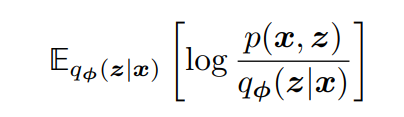

La relation avec la vraisemblance est la suivante :


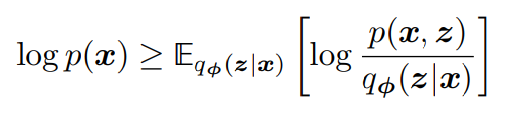

Avec:
\begin{align}
{q_{ᶿ}(z \mid x)},
    \end{align}
  est une distribution variationnelle approximative avec le paramètre Θ à optimiser. Mais comment obtient-on l'inéquation en question?


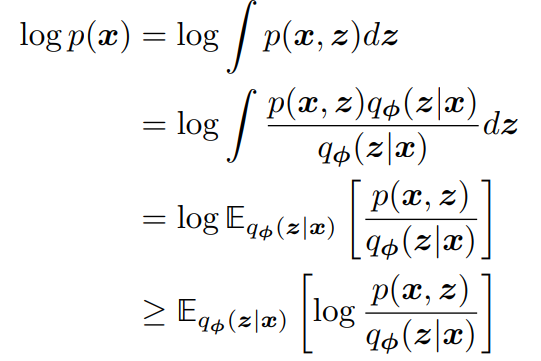

Expliquons les calculs ci-dessus :

* Tout d'abord, introduisons le log dans l'évidence comme expliqué ci-dessus.
* Multipliez par la distribution 'q' ci-dessus et ci-dessous (1=x/x)
* La troisième ligne est la définition de l'espérance
* Il suffit d'appliquer l'inégalité de Jensen pour passer à l'inégalité.
    


Cependant, la preuve ci-dessus ne donne aucune intuition sur la raison pour laquelle l'ELBO est effectivement une borne inférieure de l'évidence


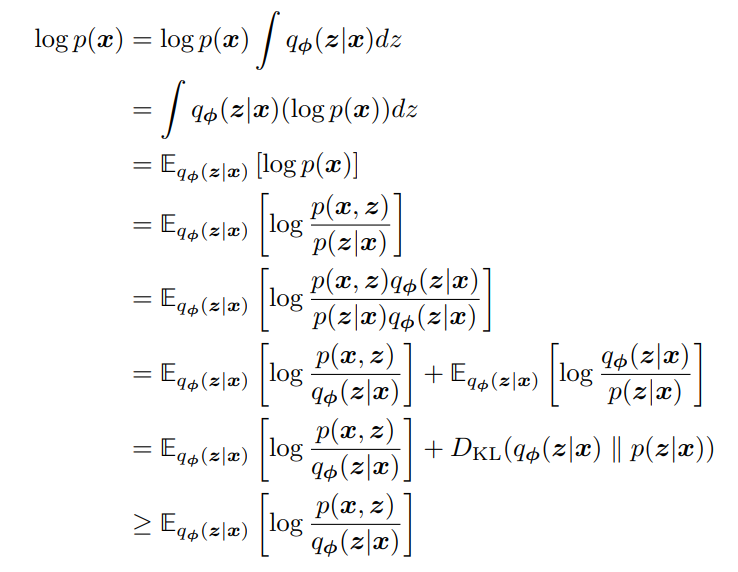

Nous savons maintenant pourquoi l'ELBO est effectivement une borne inférieure : la différence entre l'évidence et l'ELBO est un terme KL strictement non négatif, donc la valeur de l'ELBO ne peut jamais dépasser l'évidence.
Ensuite, nous explorons pourquoi nous cherchons à maximiser l'ELBO. Ayant introduit des variables latentes $z$ que nous aimerions modéliser, notre objectif est d'apprendre cette structure latente sous-jacente qui décrit nos données observées. En d'autres termes, nous voulons optimiser les paramètres de notre posterior variationnel $q_\phi(z \mid x)$ pour qu'il corresponde exactement à la vraie distribution postérieure $p(z \mid x)$, ce qui est réalisé en minimisant leur divergence KL (idéalement à zéro).

Il est impossible de minimiser directement ce terme de divergence KL, car nous n'avons pas accès à la vraie distribution  $p(z \mid x)$.

Cependant, remarquez que du côté gauche de l'équation 15, la vraisemblance de nos données (et donc notre terme d'évidence $\log p(x)$) est toujours une constante par rapport à $\phi$, car elle est calculée en marginalisant tous les latents $z$ de la distribution conjointe $p(x, z)$ et ne dépend donc absolument pas de $\phi$. Puisque les termes ELBO et divergence KL s'additionnent à une constante, toute maximisation du terme ELBO par rapport à $\phi$ invoque nécessairement une minimisation égale du terme de divergence KL. Ainsi, l'ELBO peut être maximisé en tant que proxy pour apprendre à modéliser parfaitement la vraie distribution postérieure latente ; plus nous optimisons l'ELBO, plus notre postérieur approximatif se rapproche du vrai postérieur. De plus, une fois entraîné, l'ELBO peut être utilisé pour estimer la vraisemblance des données observées ou générées, puisqu'il est appris pour approximer l'évidence du modèle $\log p(x)$.


Mais pourquoi l'ELBO ?
L'ELBO est un concept fondamental de l'inférence variationnelle.
Les modèles de diffusion et les VAE impliquent des variables latentes et l'inférence d'informations les concernant.

* **Variables latentes :** Dans les VAE, les variables latentes représentent un code compressé des données d'entrée. Dans les modèles de diffusion, les niveaux de bruit à différents pas de temps peuvent être considérés comme des variables latentes.
* **Inférence :** Les deux modèles visent à déduire la distribution postérieure de ces variables latentes étant donné les données observées.

--> L'ELBO est un concept large qui peut être appliqué à la discussion de tout modèle comportant des représentations latentes cachées.

Les bornes inférieures variationnelles sont extrêmement utiles lorsqu'il s'agit de modèles où les interactions entre $x$ et la représentation cachée $z$ sont complexes. Par conséquent, pour entraîner de tels modèles, nous cherchons à maximiser la log-vraisemblance en poussant la borne inférieure vers le haut.


*Qu*'en est-il d'une autre explication pour mieux comprendre?
    


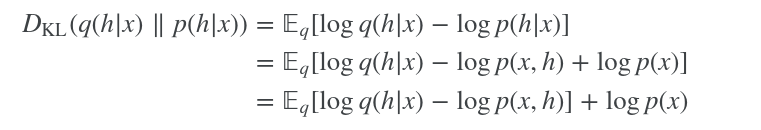

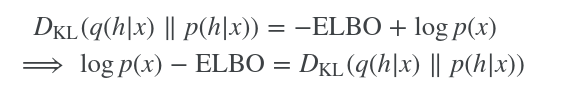

Maintenant, nous pouvons utiliser l'image créée précédemment. Exécutez la cellule suivante pour redimensionner l'image à 256x256 afin qu'elle soit plus facile à manipuler. Si vous n'avez pas créé d'image, nous téléchargerons l'exemple original de Starry Night Baobab
    


### Exemple de diffusion progressive appliquée à une image


In [ ]:
# @title Redimensionner ou télécharger (Exécuter la cellule)

if 'image' not in locals() or image is None:
    print("Aucune image trouvée, téléchargement de l'exemple du coucher de soleil sur le Baobab !\n")
    url = "https://i.ibb.co/D8yWtrp/baobab.png"
    image = Image.open(requests.get(url, stream=True).raw)

if image.size[0]>256:
    image = image.resize((256,256))

image



Appliquons la fonction à l'image et obtenons une liste d'images à chaque pas de temps $t$.

Tout d'abord, nous convertissons l'image (un tableau d'entiers 8 bits avec des valeurs RVB allant de 0 à 255) en une image normalisée avec des valeurs allant de [-1, 1]


**Travail de groupe :** Pourquoi devons-nous normaliser l'image de -1 à 1 ?

_Indice : pensez aux distributions gaussiennes_


In [ ]:
x_0 = jnp.asarray(image, dtype=jnp.float32)[jnp.newaxis, ...]
x_0 = x_0 / 255.0  # normalise les images à [0, 1]
x_0 = (x_0 * 2.0) - 1.0  # convertir l'intervalle à [-1, 1]

key = jax.random.PRNGKey(0)

x_t = x_0
x_t_history = [x_t] # Sauvegarder la première image

for t in range(1, T+1):
    noise = jax.random.normal(key, x_t.shape)
    x_t = q_sample_one_timestep(x_t, t, noise)
    x_t_history.append(x_t)



Super ! Maintenant, nous pouvons les visualiser. Ci-dessous, nous affichons $\mathbf{x}_0$, $\mathbf{x}_3$, $\mathbf{x}_{10}$, $\mathbf{x}_{60}$, $\mathbf{x}_{100}$, et $\mathbf{x}_{200 = T}$ de gauche à droite.
    


In [ ]:
# @title Évolution de la diffusion (Exécuter la cellule)
ts = [0, 3, 10, 60, 100, 200]

# TODO supprimer les graduations des axes

num_cols = len(ts)
fig, axs = plt.subplots(figsize=(50, 50), nrows=1, ncols=num_cols, squeeze=False)
for i, t in enumerate(ts):

    # remettre l'image à l'échelle 0-255
    noisy_image = (x_t_history[t] + 1.0) / 2.0
    noisy_image = noisy_image * 255.0
    noisy_image = np.array(noisy_image).astype(jnp.uint8)[0]

    ax = axs[0, i]
    ax.imshow(noisy_image)
    ax.set_title(f"$t={t}$", fontsize=30)

    # Supprimer les étiquettes et les graduations des axes
    ax.axis('off')

plt.tight_layout()


Et voilà, nous avons compris le processus de diffusion vers l'avant ! Nous sommes capables de prendre une image et d'y ajouter du bruit de manière itérative.


### Les mathématiques derrière la diffusion vers l'avant (facultatif)


Nous étudions la justification derrière la maximisation de l'ELBO. En introduisant des variables latentes, notre objectif devient de capturer la structure latente sous-jacente qui explique nos données observées. En substance, nous visons à aligner notre distribution a posteriori estimée sur la vraie distribution a posteriori, en minimisant leur divergence (divergence KL). Cependant, l'optimisation directe de cette divergence est impossible d'un point de vue calculatoire en raison de l'inaccessibilité de la vraie distribution a posteriori.

Fait intéressant, l'ELBO et la divergence KL sont intrinsèquement liées. Maximiser l'ELBO équivaut à minimiser la divergence KL.


**Comment faire ?**

Les VAEs et les modèles de diffusion utilisent tous deux l'inférence variationnelle.

Dans notre cas, nous maximisons directement l'ELBO. Cette approche est variationnelle car nous optimisons le meilleur $q_\phi(z \mid x)$ parmi une famille de distributions a posteriori potentielles paramétrées par $\phi$. Elle est appelée auto-encodeur car elle rappelle un modèle d'auto-encodeur traditionnel, où les données d'entrée sont entraînées à se prédire elles-mêmes après avoir subi une étape intermédiaire de représentation par goulot d'étranglement.

**Notation en apprentissage profond (Deep Learning):**

L'inférence variationnelle (VI) est une technique utilisée pour approximer des distributions a posteriori complexes. Considérons un modèle à variable latente où nous observons des données $x$ et souhaitons déduire la variable latente $z$. Mathématiquement, nous nous intéressons à la distribution a posteriori $p(z \mid x)$.


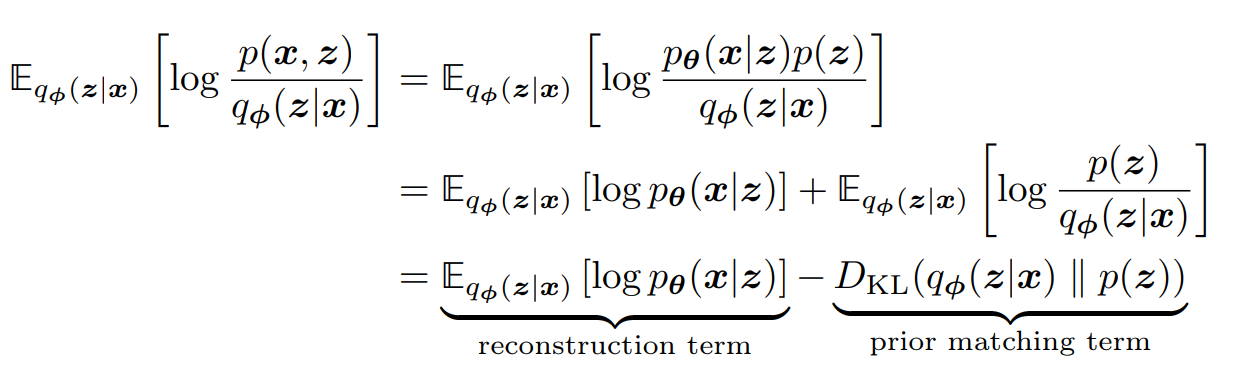

Dans ce cas, nous apprenons une distribution intermédiaire de type goulot d'étranglement $q_\phi(z \mid x)$ qui peut être traitée comme un encodeur ; elle transforme les entrées en une distribution sur les latences possibles. Simultanément, nous apprenons une fonction déterministe $p_\theta(x \mid z)$ pour convertir un vecteur latent donné $z$ en une observation $x$, qui peut être interprétée comme un décodeur.

Dans la dernière équation introduite :
* Le premier terme mesure la vraisemblance de reconstruction du décodeur à partir de notre distribution variationnelle : cela garantit que la distribution apprise modélise des latences efficaces à partir desquelles les données originales peuvent être régénérées.
* Le deuxième terme mesure à quel point la distribution variationnelle apprise est similaire à une croyance a priori sur les variables latentes.


Une caractéristique déterminante de la VAE est la façon dont l'ELBO est optimisé conjointement sur les paramètres $\phi$ et $\theta$. L'encodeur de la VAE est généralement choisi pour modéliser une gaussienne multivariée avec une covariance diagonale, et la loi a priori est souvent sélectionnée comme étant une gaussienne multivariée standard.

**Optimisation conjointe de $\phi$ et $\theta$**

Une caractéristique déterminante des VAE est l'optimisation simultanée de deux ensembles de paramètres :

- **$\phi$ : Paramètres du réseau encodeur.**
- **$\theta$ : Paramètres du réseau décodeur.**

<!-- "Joint optimization" traduit par "optimisation conjointe" -->
Cette optimisation conjointe est cruciale pour l'apprentissage d'une représentation significative de l'espace latent. L'encodeur mappe les données d'entrée à une distribution de l'espace latent, tandis que le décodeur génère des données à partir d'échantillons tirés de cet espace latent. Les deux composants sont affinés de manière itérative pour maximiser l'ELBO.

**L'ELBO comme fonction objective**

<!-- "Evidence Lower Bound (ELBO)" laissé tel quel -->
L'Evidence Lower Bound (ELBO) est une borne inférieure sur la vraisemblance marginale des données observées. Elle sert de fonction objective pour l'entraînement de la VAE. En maximisant l'ELBO, nous cherchons à :

- Améliorer la capacité de l'encodeur à capturer la distribution de données sous-jacente.
- Améliorer la capacité du décodeur à reconstruire les données originales à partir de l'espace latent.

**Encodeur gaussien multivarié**

L'encodeur dans une VAE modélise généralement l'espace latent comme une distribution gaussienne multivariée. Cela signifie que l'encodeur génère les paramètres d'une distribution gaussienne (moyenne et matrice de covariance) pour chaque point de données d'entrée. Ce faisant, la VAE peut capturer des relations complexes entre les variables latentes et générer des sorties diverses.

En résumé, la force de la VAE réside dans sa capacité à optimiser conjointement l'encodeur et le décodeur par la maximisation de l'ELBO. L'utilisation d'une distribution gaussienne multivariée pour l'encodeur permet une représentation flexible de l'espace latent.
    


## 1.6 Diffusion inverse

Maintenant que nous avons compris le processus de diffusion progressif, qu'en est-il du processus de diffusion inverse ? Rappelons que pour la diffusion inverse, nous voulons éliminer le bruit d'une image. Étant donné une image corrompue au pas de temps $t$ et une image cible $\mathbf{x}_0$, nous voulons nous rapprocher itérativement de $\mathbf{x}_0$.

Pour les images, nous pouvons définir cette distribution de débruitage **inverse** comme une gaussienne paramétrée comme suit :

$$
q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0) = \mathscr{N}\left(\mathbf{x}_{t-1} ; \frac{1}{1-\bar{\alpha}_t}(\sqrt{\alpha_t}(1-\bar{\alpha}_{t-1})\mathbf{x}_t + \sqrt{\bar{\alpha}_{t-1}}(1-\alpha_t)\mathbf{x}_0), \frac{(1-\alpha_t)(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha_t}}\mathbf{I}\right)
$$

<!-- "reverse diffusion process" traduit par "processus de diffusion inverse"
     "forward process" traduit par "processus de diffusion progressif"
     "remove noise" traduit par "éliminer le bruit"
     "corrupted image" traduit par "image corrompue"
     "target image" traduit par "image cible"
     "reverse denoising distribution" traduit par "distribution de débruitage inverse"
-->

C'est beaucoup d'informations à assimiler ! Décomposons cela en une moyenne et une covariance distinctes. Tout d'abord, la moyenne est définie comme suit :

$$
\mu_q(\mathbf{x}_t,\mathbf{x}_0) = \frac{1}{1-\bar{\alpha}_t}(\sqrt{\alpha_t}(1-\bar{\alpha}_{t-1})\mathbf{x}_t + \sqrt{\bar{\alpha}_{t-1}}(1-\alpha_t)\mathbf{x}_0)
$$

Bien que cela puisse paraître compliqué, il s'agit essentiellement d'une interpolation entre $\mathbf{x}_t$ et $\mathbf{x}_0$ avec un tas de constantes de normalisation. L'intuition est que pour les petites valeurs de $t$, $\bar{\alpha}_t$ sera grand (proche de 1). Cela a pour conséquence que la moyenne $\mu_q$ est plus proche de $\mathbf{x}_0$ pour les petites valeurs de $t$, et plus proche de $\mathbf{x}_t$ pour les grandes valeurs de $t$. Voir [Luo C](https://arxiv.org/pdf/2208.11970.pdf) pour la dérivation complète.

<!-- "Lets break it up into a separate mean and covariance" traduit par "Décomposons cela en une moyenne et une covariance distinctes" -->

D'autre part, la covariance est simplement une fonction de $t$, et peut être définie comme suit :

$$
\Sigma_q(t) = \frac{(1-\alpha_t)(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha_t}}\mathbf{I}
$$

Pour les petites valeurs de $t$, la variance est faible, mais lorsque $t \rightarrow T$, la variance approche $1$.

<!-- "On the other hand" traduit par "D'autre part" -->


### Introduction mathématique à la diffusion inverse (Facultatif)

De manière similaire au processus progressif, nous avons inclus ici une section avec quelques éléments mathématiques derrière le processus inverse. Cette section est également facultative si vous souhaitez approfondir les aspects mathématiques !
    
<!-- "Math intro" traduit par "Introduction mathématique" -->
<!-- "forward process" traduit par "processus progressif" (voir traduction de la cellule précédente pour la cohérence) -->
<!-- "reverse process" traduit par "processus inverse" -->
<!-- "deeper dive" traduit par "approfondir" -->


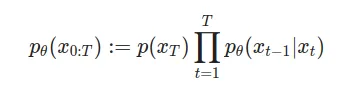

où :


    



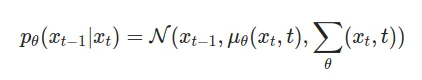

On peut expliquer l'équation ci-dessus comme suit : $p_\theta(x_{0:T})$ (processus de diffusion) est une chaîne de transitions gaussiennes commençant à $p(x_T)$ et itérant $T$ fois en utilisant l'équation pour une étape du processus de diffusion $p_\theta(x_{t-1} \mid x_t)$.

Ce qui est important de savoir est que...


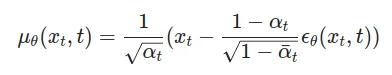

ce qui nous donne :


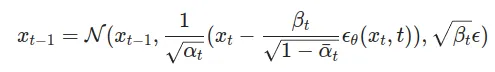

**Section mathématique :**

plongeons plus profondément dans les mathématiques:
$q(x_t \mid x_0)$ peut être dérivé récursivement par des applications répétées de l'astuce de reparamétrage.

**Qu'est-ce que l'astuce de reparamétrage ?**

Dans les auto-encodeurs variationnels (VAE), nous cherchons à apprendre les paramètres d'une distribution a posteriori approximative, généralement une gaussienne, $q(z \mid x)$. Cette distribution est utilisée pour échantillonner des variables latentes $z$, qui sont ensuite décodées pour reconstruire l'entrée $x$.

Le défi se pose lorsqu'on essaie de calculer les gradients par rapport aux paramètres du réseau de l'encodeur, car l'échantillonnage à partir d'une distribution n'est pas une opération différentiable. Cela empêche l'utilisation de la rétropropagation (Backpropagation), pierre angulaire de l'apprentissage des réseaux de neurones.

**La solution : le reparamétrage**

L'astuce de reparamétrage offre une solution élégante. Au lieu d'échantillonner directement à partir de $q(z \mid x)$, nous introduisons une variable aléatoire auxiliaire $\epsilon$, généralement échantillonnée à partir d'une distribution normale standard $\mathcal{N}(0, I)$.

La variable latente $z$ est ensuite calculée comme suit :

              z = µ + σ * ε

Où :
* $\mu$ et $\sigma$ sont respectivement la moyenne et l'écart type de $q(z \mid x)$, produits par le réseau de l'encodeur.
* $\epsilon$ est le bruit échantillonné à partir de la distribution normale standard.
    


Supposons que nous ayons accès à 2T variables aléatoires de bruit suivant une distribution gaussienne, alors, pour un échantillon arbitraire xt ∼ q(xt|x0), nous pouvons réécrire :

    


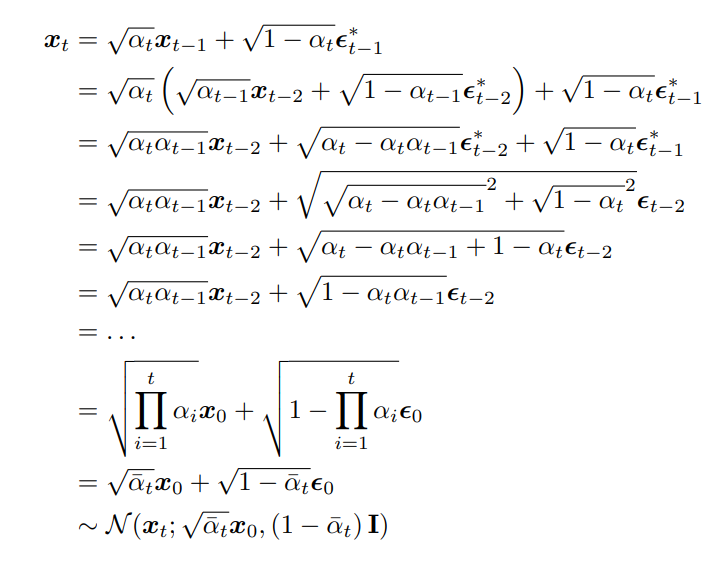

... où nous avons utilisé le fait que la somme de deux variables aléatoires gaussiennes indépendantes reste une gaussienne, avec la moyenne étant la somme des deux moyennes, et la variance étant la somme des deux variances. Nous appliquons ensuite à nouveau l'astuce de reparamétrisation.

Nous avons donc dérivé la forme gaussienne de $q(x_t \mid x_0)$. Cette dérivation peut être modifiée pour obtenir également la paramétrisation gaussienne décrivant $q(x_{t-1} \mid x_0)$. Maintenant, connaissant les formes de $q(x_t \mid x_0)$ et $q(x_{t-1} \mid x_0)$, nous pouvons procéder au calcul de la forme de $q(x_{t-1} \mid x_t, x_0)$ en remplaçant dans le développement de la règle de Bayes :


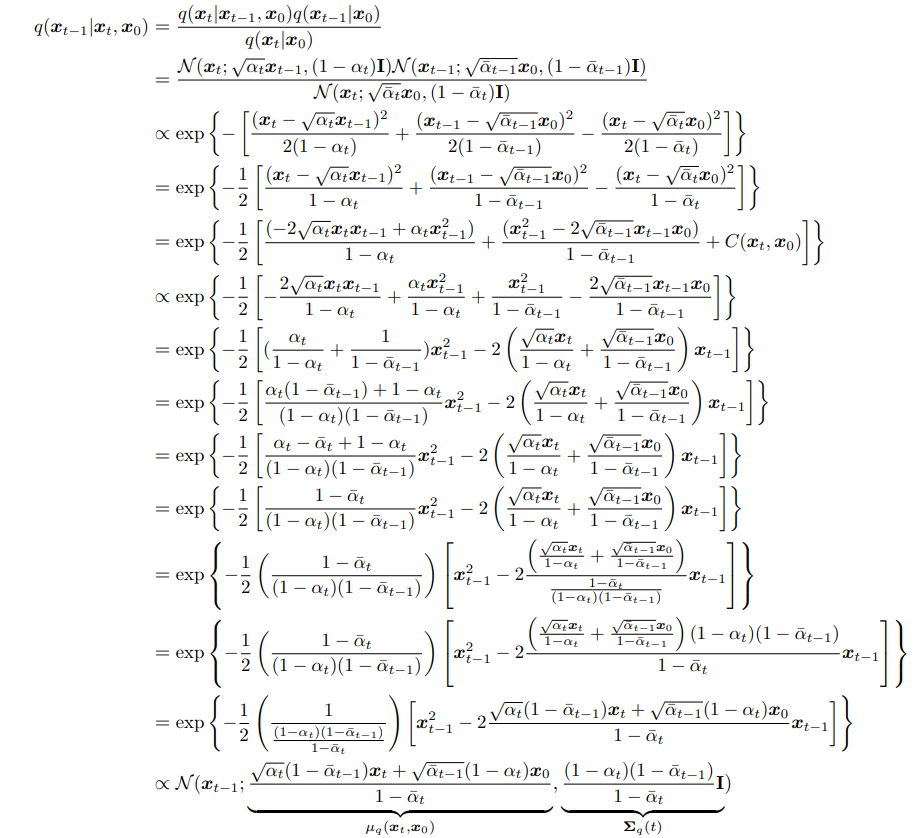

### Diffusion inverse en pratique


In [ ]:
def mu_q(x_t, x_0, t):
    alpha_cumprod_t = extract(alphas_cumprod, t, x_t.shape)
    alpha_cumprod_tm1 = extract(alphas_cumprod, t-1, x_t.shape)
    alpha_t = extract(alphas, t, x_t.shape)

    return (1 / (1 - alpha_cumprod_t)) * (jnp.sqrt(alpha_t)*(1 - alpha_cumprod_tm1)*x_t + jnp.sqrt(alpha_cumprod_tm1)*(1 - alpha_t)*x_0)

def var_q(t, shape):
    alpha_cumprod_t = extract(alphas_cumprod, t, shape)
    alpha_cumprod_tm1 = extract(alphas_cumprod, t-1, shape)
    alpha_t = extract(alphas, t, shape)

    return (1 - alpha_t) * (1 - alpha_cumprod_tm1) / (1 - alpha_cumprod_t)



Afin de mieux comprendre ces équations, essayons de visualiser les distributions. Dans cet exemple, nous allons considérer une seule valeur scalaire, où $x_0 = 0,5$ et $x_t = 0,1$. Nous pouvons ensuite tracer les distributions gaussiennes.
    


In [ ]:
import seaborn as sns
key = jax.random.PRNGKey(0)

x_t = jnp.array([0.1])
x_0 = jnp.array([0.5])

# Add x_0 and x_t
# Essayer d'augmenter la variance (Try increase variance)
ts = [10, 30, 100, 200]

cmap = sns.color_palette("coolwarm", n_colors=4)

for i,t in enumerate(ts):
    noise = jax.random.normal(key, (10000,))
    mean = mu_q(x_t, x_0, t)
    # Nous multiplions par 2 ici juste pour mieux visualiser les distributions (We're multiplying by 2 here just to better visualise the distributions)
    var = var_q(t, x_t.shape) * 2
    plt.hist(mean + noise * var , bins=20, density=True, color=cmap[i])

plt.xlabel("$x_t$", fontsize=20)
plt.ylabel("densité (density)", fontsize=14)
plt.legend([f"$t={t}$" for t in ts])
plt.grid()
plt.show()


## 1.7 Augmenter le processus inverse avec un modèle (Augmenting the reverse process with a model)

Génial ! Nous savons maintenant comment aller en **avant** et en **arrière**, mais nous avons un problème. Le processus inverse est conditionné par $\mathbf{x}_0$, mais que sera $\mathbf{x}_0$ en pratique si nous voulons générer de nouvelles images ? C'est là que le modèle entre en jeu ! Nous laissons le modèle faire une prédiction de $\mathbf{x}_0$, appelée $\mathbf{\hat{x}}_0$, puis nous utilisons le processus inverse comme d'habitude.

Concrètement, nous pouvons maintenant écrire la distribution $p(\mathbf{x}_{t-1}|\mathbf{x}_t) $ paramétrée par un modèle avec des poids $\theta$ :

$$
p(\mathbf{x}_{t-1}|\mathbf{x}_t) = \mathscr{N}\left(\mathbf{x}_{t-1}; \frac{1}{1-\bar{\alpha}_t}(\sqrt{\alpha_t}(1-\bar{\alpha}_{t-1}\mathbf{x}_t) + \sqrt{\bar{\alpha}_{t-1}}(1-\alpha_t)\hat{\mathbf{x}}_0), \frac{(1-\alpha_t)(1-\bar{\alpha}_{t-1})}{1-\bar{\alpha_t}}\mathbf{I}\right)
$$

où le modèle prédit une distribution sur $\mathbf{\hat{x}}_0$, et $\alpha_t$ est défini plus tôt dans la Section 1.4 :

$$
p(\hat{\mathbf{x}}_0 | \mathbf{x}_t, \mathbf{c}) = \texttt{Model}(\mathbf{x}_t, \mathbf{c}, \theta)
$$

où $\mathbf{c}$ est une entrée de conditionnement optionnelle et $\theta$ sont les paramètres du modèle. Pour les modèles de diffusion comme celui utilisé dans la Section 1, $\mathbf{c}$ représente un encodage du conditionnement du texte. Le plus souvent, un encodeur de texte [CLIP](https://github.com/openai/CLIP) figé est utilisé pour cela, car les plongements de texte sont assez riches et déjà entraînés à contenir des informations pertinentes pour les images. Étant donné une séquence de texte, l'encodeur de texte CLIP génère un plongement de dimension fixe représentant le contenu de la séquence.

_Remarque : Bien que CLIP soit le moyen le plus courant d'effectuer un conditionnement, nous ne l'utiliserons pas dans la section suivante du TP. Cela est dû à la simplicité de la tâche d'apprentissage que nous allons examiner, où une simple couche `nn.Embed` est suffisante. N'hésitez pas à enrichir le modèle avec vos propres intégrations de texte, surtout si vous choisissez d'utiliser l'ensemble de données Fashion MNIST !_


Nous allons maintenant visualiser $p(\mathbf{x}_{t-1}|\mathbf{x}_t)$ et $q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$. Précédemment, nous avons laissé $\mathbf{x}_t$ être un scalaire. Dans cet exemple, nous allons laisser $\mathbf{x}_t$ avoir deux dimensions. Dans cet exemple, nous choisissons arbitrairement :
- $\mathbf{x}_0 = [-0.6, -0.5]$
- $\hat{\mathbf{x}}_0 = [-0.7, 0.1]$
- $\mathbf{x}_t = [0.6, 0.5]$
    


In [ ]:
# @title Visualiser les distributions en fonction de $t$ (Exécuter la cellule) {run: "auto"}

import matplotlib
import numpy as np
from matplotlib.lines import Line2D


x_0 = [-6/10.,-5./10]
x_0_hat = [-7./10, 1./10]
x_t = [6./10,5./10]

t = 50 #@param {type:"slider", min:0, max:200, step:5}

plt.clf()
plt.figure(figsize=(9,6))
ax = plt.gca()
ax.clear()


plt.plot([x_t[0], x_0[0]], [x_t[1], x_0[1]], linestyle='dashed', color='blue', alpha=0.5)
plt.plot([x_t[0], x_0_hat[0]], [x_t[1], x_0_hat[1]], linestyle='dashed', color='red', alpha=0.5)

plt.scatter(x_0[0], x_0[1], c='black')
plt.scatter(x_0_hat[0], x_0_hat[1], c='black')
plt.scatter(x_t[0], x_t[1], c='black')

delta = 0.005
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-.75, .75, delta)
X, Y = np.meshgrid(x, y)


if t > 0:
    # (mean = moyenne, var = variance)
    mean = mu_q(jnp.array(x_t), jnp.array(x_0), jnp.array([t,t]))
    # Nous multiplions par 2 ici juste pour mieux visualiser les distributions
    var = var_q(jnp.array([t]), (1,))[0]*5
    Z = bivariate_normal(X, Y, var, var, mean[0], mean[1])
    CS = plt.contour(X, Y, Z, [Z.max()*(1-.95)], colors = 'blue', alpha=1, linestyles="solid")

    mean = mu_q(jnp.array(x_t), jnp.array(x_0_hat), jnp.array([t,t]))
    # Nous multiplions par 2 ici juste pour mieux visualiser les distributions
    var = var_q(jnp.array([t]), (1,))[0]*5
    Z = bivariate_normal(X, Y, var, var, mean[0], mean[1])
    CS = plt.contour(X, Y, Z, [Z.max()*(1-.95)], colors = 'red', alpha=1, linestyles="solid")
else:

    plt.scatter(x_0[0], x_0[1], c='blue', s=2)
    plt.scatter(x_0_hat[0], x_0_hat[1], c='red', s=2)

ax.annotate("$\mathbf{x}_0$", (x_0[0]-0.2/10, x_0[1]-1.2/10), fontsize=16)
ax.annotate("$\hat{\mathbf{x}}_0$", (x_0_hat[0]-0.2/10, x_0_hat[1]-1.2/10), fontsize=16)
ax.annotate("$\mathbf{x}_t$", (x_t[0]-0.2/10, x_t[1]-1.2/10), fontsize=16)

legend_elements = [Line2D([0], [0], color='blue', label='$q(\mathbf{x}_{t-1} | \mathbf{x}_t, \mathbf{x}_0)$'),
                   Line2D([0], [0], color='red', label='$p(\mathbf{x}_{t-1} | \mathbf{x}_t)$')]

ax.legend(handles=legend_elements, loc='lower right', fontsize=16)


plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16);



La forme des distributions est représentée par les cercles rouges et bleus, où le rayon donne une indication de la variance. Notez comment lorsque $t$ diminue, le rayon de la variance diminue, et la moyenne se déplace linéairement (le long des lignes pointillées) vers chaque ${\mathbf{x}}_0$ respectif. Lorsque $t=T=200$, la variance est à son maximum.

**Travail de groupe :**
- Pourquoi la distribution est-elle un cercle ? (c'est-à-dire une variance égale dans les deux dimensions)
    


# 2. Entraînement et échantillonnage (génération d'images)
    


## 2.1. Assemblage des éléments


## 2.1. Assemblage des éléments

    Maintenant que nous avons toutes les parties, assemblons-les pour créer notre propre modèle de diffusion ! Tout d'abord, regardons la boucle d'entraînement.

### Entraînement

L'entraînement se déroule comme suit :
- Dans chaque **lot**, nous échantillonnons $\mathbf{c}$, $\mathbf{x}_0$ et $t$
  - $t$ est un entier échantillonné aléatoirement entre 0 et $T$ pour chaque élément du lot.
- Nous échantillonnons $\mathbf{x}_t \sim q(\mathbf{x}_t | \mathbf{x}_0)$
- Le modèle prédit $\hat{\mathbf{x}}_0 \sim p(\hat{\mathbf{x}}_0 | \mathbf{x}_t, \mathbf{c}) = \texttt{Model}(\mathbf{x}_t, \mathbf{c}, \theta)$
- Calculer la perte et mettre à jour les poids $\theta$


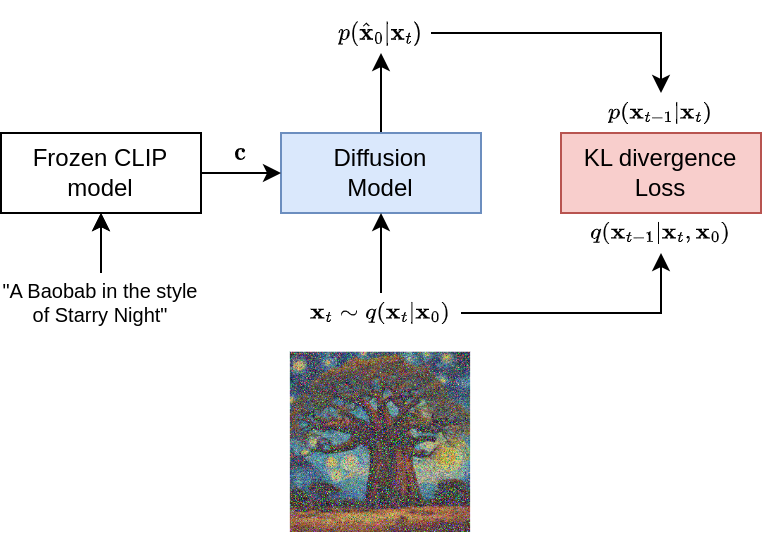

En général, comme fonction de perte, nous calculons la divergence de Kullback-Leibler (une mesure permettant de comparer la similarité de deux distributions) entre la véritable distribution inverse  $q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$ et la distribution prédite par le modèle $p(\mathbf{x}_{t-1}|\mathbf{x}_t)$ :

$$
\mathcal{L} = \text{KL}(q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)\ ||\ p(\mathbf{x}_{t-1}|\mathbf{x}_t))
$$

Pour donner un sens à cette fonction de perte, regardez la visualisation de la distribution de la section précédente. La divergence KL compare la distribution du cercle rouge à la distribution du cercle bleu !

La boucle d'entraînement peut sembler étrange. Pourquoi échantillonnons-nous une valeur aléatoire pour $t$ et n'itérons-nous pas de $T$ à $0$ ? Que se passerait-il si nous donnions au modèle un bruit aléatoire et lui disions de le débruiter itérativement avec l'image cible ? Théoriquement, nous pourrions le faire, mais cela entraînerait probablement beaucoup plus de surapprentissage, ou il pourrait même ne pas apprendre du tout ! Si nous montrons à l'image un seul échantillon de la même image par lot, cela permet d'éviter le surapprentissage. De plus, si nous donnons au modèle une image qui n'est que _légèrement bruitée_, cela permettrait de stabiliser l'entraînement car la tâche est relativement facile pour les faibles valeurs de $t$. C'est peut-être aussi pour cela que les modèles de diffusion sont si performants ? Discutez-en avec vos voisins !


### Génération et échantillonnage

Le processus de génération de nouvelles images est relativement simple. Nous commençons simplement avec un échantillon aléatoire $\mathbf{x}_T \sim \mathscr{N}(\mathbf{x}_T ; \mathbf 0, \mathbf I)$ et décodons itérativement jusqu'à ce que nous atteignions $\mathbf x_0$.
    


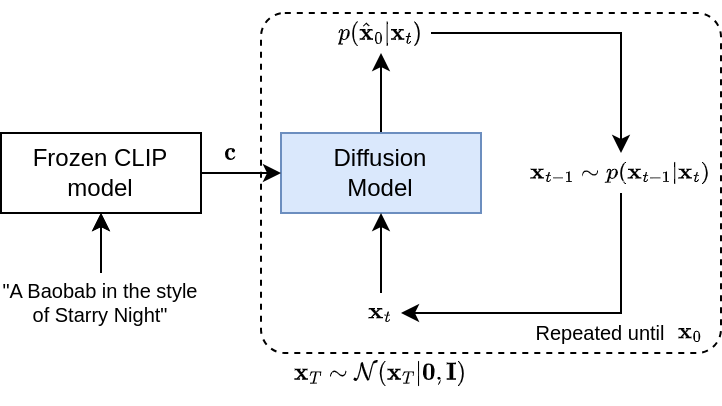

Ceci est assez différent de la façon dont le modèle est entraîné. Cette fois, nous commençons à partir d'un bruit aléatoire et itérons $t$ de $T$ à $0$. Pourquoi cela fonctionne-t-il alors que ce n'est pas ainsi que le modèle est entraîné ? Si le modèle a été suffisamment entraîné (assez longtemps), il devrait avoir vu les mêmes types d'images pour toutes les valeurs de $t$, donc cela ne devrait pas poser de problème ! Encore une fois, discutez-en avec vos voisins !


## 2.2 Diffusion en une dimension


Plutôt que d'utiliser un modèle de diffusion pour apprendre quelque chose de compliqué et de haute dimension, comme la distribution des pixels d'une image, nous allons d'abord essayer d'apprendre une distribution unidimensionnelle : deux distributions normales avec des moyennes différentes additionnées. Appelons cette distribution $q(x)$ :


In [ ]:
np.random.seed(0)

NUM_SAMPLES: int = 1200  # Nombre d'échantillons
NUM_NOISE_STEPS: int = 300  # Nombre de pas de bruit
MEAN_1: float = -4. # Moyenne 1
MEAN_2: float = 2.0 # Moyenne 2
samples_1 = np.random.normal(size=NUM_SAMPLES // 2, loc=MEAN_1)
samples_2 = np.random.normal(size=NUM_SAMPLES // 2, loc=MEAN_2)
q_samples = np.concatenate((samples_1, samples_2))

plt.grid(axis='y')
seaborn.histplot(q_samples, bins=30, kde=True, zorder=2);


**Observation clé** : pour toute distribution possible $q(x)$, si on ajoute de petites quantités de bruit gaussien suffisamment de fois, on obtient une distribution gaussienne ! Voyons cela en action avec notre $q(x)$ :
    


In [ ]:
BETA = 0.02

def add_noise_to_samples(data: np.ndarray, num_steps: int) -> np.ndarray:
  data_saved = [data]
  for step in range(num_steps):
    mean = data * np.sqrt(1 - BETA)
    # On utilise un bruit constant, mais il existe beaucoup d'autres choix plus complexes.
    # Voir https://sander.ai/2024/06/14/noise-schedules.html
    stddev = np.sqrt(BETA)
    data = np.random.normal(size=len(data), loc=mean, scale=stddev)
    data_saved.append(data)
  return data_saved

# distribution_samples_noise (q_samples_noised) est une liste de longueur NUM_NOISE_STEPS, chaque élément
# de la liste est un tableau NumPy de longueur NUM_NOISE_STEPS.
q_samples_noised = add_noise_to_samples(q_samples, num_steps=NUM_NOISE_STEPS)
# affiche la densité de probabilité de l'échantillon le plus bruité
seaborn.histplot(q_samples_noised[-1], bins=30, kde=True, stat='probability')



On peut animer ce processus :
    


In [ ]:
# @title Animer la diffusion (Exécuter la cellule)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()

def update(t):
    ax.clear()
    # (q_samples_noised: échantillons bruités)
    seaborn.histplot(q_samples_noised[t].flatten(), bins=np.arange(-8, 5, 0.25), kde=True, ax=ax);
    ax.set_xlim(-8, 5)  # Ajuster les limites si besoin
    ax.set_title(f't = {t}')
    plt.close()

ani = FuncAnimation(fig, update, frames=range(0, NUM_NOISE_STEPS + 1, 10), repeat=False)

# Sauvegarder l'animation comme vidéo HTML5
html_video = ani.to_html5_video()
HTML(html_video)



Ce qui est approximativement gaussien avec une moyenne de 0 et un écart type de 1 (c'est-à-dire une distribution normale standard) :

**Travail de groupe :** Pouvez-vous expliquer pourquoi cela se produit ?
    


In [ ]:
print('mean: ', np.mean(q_samples_noised[-1]))
print('std_dev: ', np.std(q_samples_noised[-1]))




## 2.3 Entraînement d'un modèle

**Voici la partie magique** : et si l'on pouvait entraîner un modèle à inverser le bruit que nous avons ajouté à chaque étape ? Nous pourrions alors prendre des échantillons d'une distribution normale simple $\mathscr{N}(0,1)$, appliquer ce modèle de débruitage plusieurs fois pour transformer un échantillon de $\mathscr{N}(0,1)$ en un échantillon de notre distribution originale $q(x)$ ! La tâche de débruitage est une simple tâche de régression : nous avons une liste d'échantillons `q_samples_noised` dont la longueur est le nombre d'étapes de bruit (`NUM_NOISE_STEPS`). Nous voulons prédire `q_samples_noised[i-1]` étant donné `q_samples_noised[i]` (la caractéristique). C'est un problème d'apprentissage supervisé simple ! (régression)

Cependant, nous avons une autre caractéristique que notre modèle pourrait trouver utile : l'Incrément de temps! Il sera utile que tous les incréments de temps soient compris entre 0 et 1 (chaque incrément de temps est donc de taille `1/NUM_NOISE_STEPS`). La raison de ce choix deviendra claire lorsque nous voudrons générer des échantillons plus tard.

Pour résumer: nous avons un problème d'apprentissage supervisé avec les caractéristiques d'entrée `(q_samples_noised[i], i/NUM_NOISE_STEPS)` et la valeur prédite `q_samples_noised[i]`. Préparons les données d'entraînement:
    


In [ ]:
def make_training_data(data: list[np.ndarray]) -> tuple[np.ndarray, np.ndarray]:
  data_concat = np.stack(data)

  assert data_concat.shape == (NUM_NOISE_STEPS + 1, NUM_SAMPLES)

  y_vals = data_concat[:-1].flatten()
  x_vals = data_concat[1:]

  num_noise_steps, num_samples = x_vals.shape

  time_steps = np.linspace(0, 1, num_noise_steps)
  time_steps = np.broadcast_to(time_steps.reshape((num_noise_steps, -1)), x_vals.shape)
  x_vals = np.stack((x_vals.flatten(), time_steps.flatten()), axis=-1)

  assert len(y_vals) == len(x_vals)

  return x_vals, y_vals


# (x_vals: valeurs_x, y_vals: valeurs_y)
x_vals, y_vals = make_training_data(q_samples_noised)



**Tâche**: Discutez de la forme de `x_vals` et `y_vals`. Pourquoi y a-t-il 360 000 exemples ? Indice : qu'est-ce que cela représente en termes de `NUM_NOISE_STEPS` et `NUM_SAMPLES` ?
    


In [ ]:
print('x_vals shape', x_vals.shape)
print('y_vals shape', y_vals.shape)


Nous pouvons choisir notre algorithme de régression préféré ici. Nous allons utiliser un perceptron multicouche (MLP) simple via Scikit-learn (on pourrait aussi utiliser JAX mais c'est plus simple).

**Tâche** : que se passerait-il si nous utilisions une [régression linéaire](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) à la place ? Cela fonctionnerait-il ?


In [ ]:
from sklearn.neural_network import MLPRegressor

# (reverse_model): modèle inversé
reverse_model = MLPRegressor(hidden_layer_sizes=(4, 4),
                    activation='tanh',
                    solver='lbfgs',
                    early_stopping=True)

reverse_model.fit(x_vals, y_vals)


Nous avons un modèle de diffusion entraîné ! Nous voulons maintenant produire des échantillons avec et voir si ceux-ci sont similaires à notre distribution originale.

**Résultat clé pour l'échantillonnage**: si nos pas de temps étaient suffisamment petits, alors chaque distribution inverse $q(x_{t-1} | x_t)$ est approximativement gaussienne, et notre modèle appris `reverse_model` prédit la moyenne de cette distribution.
- Ce n'est pas un fait évident. Pour ceux qui souhaitent une explication et une preuve de ce fait, voir la section 2 de https://arxiv.org/abs/2406.08929.

In [ ]:
def generate(model, num_samples: int, num_steps:int) -> np.ndarray:
  samples = np.random.normal(size=num_samples, loc=0, scale=1.)
  samples_history = [samples]
  for t in range(num_steps, 0, -1):
    # S'assurer que tous les time_steps (pas de temps) sont entre 0 et 1, comme pour l'entraînement.
    time_steps = np.repeat(t/num_steps, repeats=num_samples)
    x_val = jnp.stack((samples, time_steps), axis=-1)
    # Notre modèle appris prédit la moyenne de la gaussienne.
    mean = model.predict(x_val)
    # Fait clé : la distribution inverse est une gaussienne !
    samples = mean + np.random.normal(size=num_samples, loc=0, scale=np.sqrt(BETA))
    samples_history.append(samples)
  return samples, samples_history

# (samples): échantillons, (samples_history): historique des échantillons
samples, samples_history = generate(reverse_model, num_samples=1000, num_steps=500)

seaborn.histplot(samples.flatten(), bins=np.arange(-8, 5, 0.25), kde=True)



Nous pouvons extraire automatiquement les moyennes en ajustant un modèle de mélange gaussien


In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(samples.reshape(-1, 1))
print('moyennes de distribution apprises : ', gm.means_[1, 0], gm.means_[0, 0]) # (learnt distribution means)
print('moyennes originales : ', MEAN_2, MEAN_1) # (original means)


Assez proche !

**Tâche**: jouez avec `num_steps` dans l'appel à `generate` ci-dessus. Comment pourrions-nous décider quel serait un bon nombre pour `num_steps` ? Doit-il nécessairement s’agir du nombre avec lequel nous avons effectué l’apprentissage, `NUM_NOISE_STEPS = 300` ? Pouvez-vous maintenant expliquer pourquoi nous avons normalisé les pas de temps pour qu’ils soient compris entre 0 et 1 ? (**Indice**: pourrait-il y avoir des problèmes avec notre modèle pendant la génération si nous utilisions simplement des nombres entiers allant jusqu’à `NUM_NOISE_STEPS` pendant l’apprentissage ?)

Avant de terminer, visualisons également les échantillons à chaque pas de temps :
    


In [ ]:
# @title Visualiser la distribution au pas de temps $t$ (Exécuter la cellule) {run: "auto"}

t = 175 #@param {type:"slider", min:0, max:500, step:5}

seaborn.histplot(samples_history[t].flatten(), bins=np.arange(-8, 5, 0.25), kde=True)
plt.title(f"t={t}")


On peut même animer la génération !


In [ ]:
# @title Animer la diffusion (Exécuter la cellule)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()

def update(t):
    ax.clear()
    # (samples_history)
    seaborn.histplot(samples_history[t].flatten(), bins=np.arange(-8, 5, 0.25), kde=True, ax=ax);
    ax.set_xlim(-8, 5)  # Ajuster les limites si besoin
    ax.set_title(f't = {t}')
    plt.close()

# (samples_history)
ani = FuncAnimation(fig, update, frames=range(0, len(samples_history), 10), repeat=False)

# Sauvegarder l'animation en tant que vidéo HTML5
html_video = ani.to_html5_video()
HTML(html_video)



# Conclusion
**Résumé:**

Dans cet atelier pratique, nous avons examiné une nouvelle variante fascinante de modélisation générative : la diffusion. Nous avons exploré les deux processus utilisés pour entraîner et générer avec ces modèles, le processus de bruitage direct et le processus de débruitage inverse.

**Étapes suivantes :**

Comme prochaines étapes, nous vous encourageons à consulter l'atelier pratique de l'année dernière où nous suivons un processus similaire, mais donnons plus de détails sur les spécificités de l'exécution de ces modèles avec des images.
- https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/diffusion_models.ipynb
- Dans cet atelier pratique, nous entraînons un modèle U-Net pour générer des chiffres MNIST !

Si vous souhaitez un aperçu plus approfondi de la théorie probabiliste, nous vous encourageons à suivre l'atelier pratique de 2022 sur les modèles génératifs profonds de **James Allingham** :
- https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/deep_generative_models.ipynb
- Cet atelier pratique plonge profondément dans la théorie probabiliste derrière la diffusion et comprend une implémentation pratique dans Jax et Haiku


<!-- **Annexe :**

[Tout ce que nous n'avons pas la place d'aborder dans les principales sections pratiques (probablement des éléments mathématiques complexes).] -->

**Références :**

- Understanding Diffusion Models: A Unified Perspective ; Luo C. \
https://arxiv.org/pdf/2208.11970.pdf

- Denoising Diffusion Probabilistic Models ; Ho, J., Jain, A., Abbeel, Pieter. \
https://arxiv.org/abs/2006.11239

- Step-by-Step Diffusion: An Elementary Tutorial ; Nakkiran, P., Bradley, A., Zhou, H., Advani, M. \
https://arxiv.org/abs/2406.08929


Pour d'autres ateliers pratiques du Deep Learning Indaba, veuillez visiter [cette page](https://github.com/deep-learning-indaba/indaba-pracs-2024).
    



## Commentaires

N'hésitez pas à nous faire part de vos commentaires afin que nous puissions améliorer nos ateliers pratiques à l'avenir.
    

In [ ]:
# @title Générer un formulaire de commentaires (Exécuter la cellule)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)




<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />
    
